##  Tweets From Obama, Trump

#### Importing Libraries 

In [4]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#### Importing Cleaned Data

In [8]:
pres_data = pd.read_csv('../capstone/PRESDATA.csv')

df_pres = pd.DataFrame(pres_data)

df_pres.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

print(df_pres.shape)
df_pres.head(2)

(6439, 9)


,created_at,text,url,replies,retweets,favorites,user,party,state
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,1,D,US
1,10/2/17 12:41,Michelle & I are praying for the victims in La...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,1,D,US


### Question: Who wrote this tweet? (Obama or Trump)

##### Train Test Split

In [9]:
# Setting up X and y 
X = df_pres['text']
y = df_pres['user']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 18, 
                                                   test_size = 0.20, 
                                                   stratify = y)

X_train.shape, X_test.shape

((5151,), (1288,))

##### Count Vectorizer & Multinomial Naiive Bayes 

In [10]:
# Instantiating models 

mnb = MultinomialNB()
cv = CountVectorizer()

pipe = Pipeline([
    ('cv', cv), 
    ('mnb', mnb)
])

params = { 
    "cv__stop_words": [None, "english"], 
    "cv__min_df": [1,2,3], 
    "cv__ngram_range": [(1,1), (1,2),(2,2)]
}

gs_mnb = GridSearchCV(pipe, 
                     param_grid = params)

gs_mnb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'cv__stop_words': [None, 'english'], 'cv__min_df': [1, 2, 3], 'cv__ngram_range': [(1, 1), (1, 2), (2, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
gs_mnb.best_params_

{'cv__min_df': 2, 'cv__ngram_range': (1, 2), 'cv__stop_words': None}

In [12]:
print("3-fold Cross Validation Score on train data for Multinomial NB:", gs_mnb.best_score_)
print("Score on test data for Multinomial NB:", gs_mnb.score(X_test, y_test))

3-fold Cross Validation Score on train data for Multinomial NB: 0.972820811492914
Score on test data for Multinomial NB: 0.9650621118012422


#### CVECT & Random Forest 

In [54]:
cvect = CountVectorizer()
rf = RandomForestClassifier()

pipe_cvect_rf = Pipeline([ 
    ("cvect", cvect), 
    ("rf", rf)
])

params_cvect_rf  = { 
    "cvect__stop_words": [None, "english"], 
    "cvect__min_df": [1,2,3], 
    "cvect__ngram_range": [(1,1), (1,2),(2,2)],
    "rf__criterion": ["gini", "entropy"], 
    "rf__min_samples_split": [3, 4, 6, 9]
}

gs_cvect_rf = GridSearchCV(pipe_cvect_rf, 
                           param_grid = params_cvect_rf)

gs_cvect_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cvect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'cvect__stop_words': [None, 'english'], 'cvect__min_df': [1, 2, 3], 'cvect__ngram_range': [(1, 1), (1, 2), (2, 2)], 'rf__criterion': ['gini', 'entropy'], 'rf__min_samples_split': [3, 4, 6, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
gs_cvect_rf.best_params_

{'cvect__min_df': 2,
 'cvect__ngram_range': (1, 2),
 'cvect__stop_words': 'english',
 'rf__criterion': 'gini',
 'rf__min_samples_split': 4}

In [56]:
print("Best Score on Training Data; Count Vectorizer + Random Forest Model:", gs_cvect_rf.best_score_)
print("Best Score on Testing Data; Count Vectorizer + Random Forest Model:", gs_cvect_rf.score(X_test, y_test))

Best Score on Training Data; Count Vectorizer + Random Forest Model: 0.9588429431178412
Best Score on Testing Data; Count Vectorizer + Random Forest Model: 0.9588509316770186


### Confusion Matrix

In [15]:
test_prediction[0:100]

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [13]:
test_prediction = gs_mnb.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, test_prediction).ravel()

print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Negatives: %s" % tn)
print("True Positives: %s" % tp)

False Positives: 22
False Negatives: 23
True Negatives: 625
True Positives: 618


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_prediction))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       647
          1       0.97      0.96      0.96       641

avg / total       0.97      0.97      0.97      1288



In [18]:
# Trying to find...
    # an example of a post that properly classified 
    # an example of a post that did not properly classify 
    
fn_fp = y_test != test_prediction
fn_fp

# where true = post is misclassified. 
# where false = the post classification is correct  

In [25]:
df_fn_fp = pd.DataFrame(fn_fp)
df_fn_fp.to_csv("../capstone/fn_fp_presidents.csv")

In [50]:
misclassification_mask = df_fn_fp.query('user == True')
misclassification_mask[0:10]

,user
863,True
264,True
616,True
3555,True
12,True
5922,True
5087,True
15,True
38,True
3311,True


In [49]:
# Misclassification 
print(df_pres.iloc[863])
print(df_pres.iloc[264])
print(df_pres.iloc[616])
print(df_pres.iloc[3555])
print(df_pres.iloc[12])
print(df_pres.iloc[5922])
print(df_pres.iloc[5087])
print(df_pres.iloc[15])
print(df_pres.iloc[38])
print(df_pres.iloc[3311])
print(df_pres.iloc[4227])
print(df_pres.iloc[1259])
print(df_pres.iloc[5519])
print(df_pres.iloc[2024])

created_at                                         2/12/16 0:50
text          RT @TheEllenShow: .@BarackObama was here in 20...
url           https://twitter.com/BarackObama/status/6979457...
replies                                                     448
retweets                                                   3675
favorites                                                 11727
user                                                          1
party                                                         D
state                                                        US
Name: 863, dtype: object
created_at                                        8/25/16 15:58
text          RT @SecretaryJewell: .@NatlParkService _--- bd...
url           https://twitter.com/BarackObama/status/7688400...
replies                                                      57
retweets                                                    425
favorites                                                  1059
user           

#### Most Predictive Words

In [57]:
# What were the best parameters from my random forest model?
# Going to pull those in below
gs_cvect_rf.best_params_

{'cvect__min_df': 2,
 'cvect__ngram_range': (1, 2),
 'cvect__stop_words': 'english',
 'rf__criterion': 'gini',
 'rf__min_samples_split': 4}

In [58]:
corpus = df_pres['text']

vect = CountVectorizer(ngram_range = (1,2), 
                      stop_words = "english", 
                      min_df = 2)

vect.fit(corpus)

transformed_corpus = vect.transform(corpus)

array_corpus = transformed_corpus.toarray()
print(type(array_corpus))

# Using Best Model - Naive Bayes 
best_model = RandomForestClassifier(criterion= 'gini', 
                                    min_samples_split = 4)

best_model.fit(array_corpus, y)

<class 'numpy.ndarray'>


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

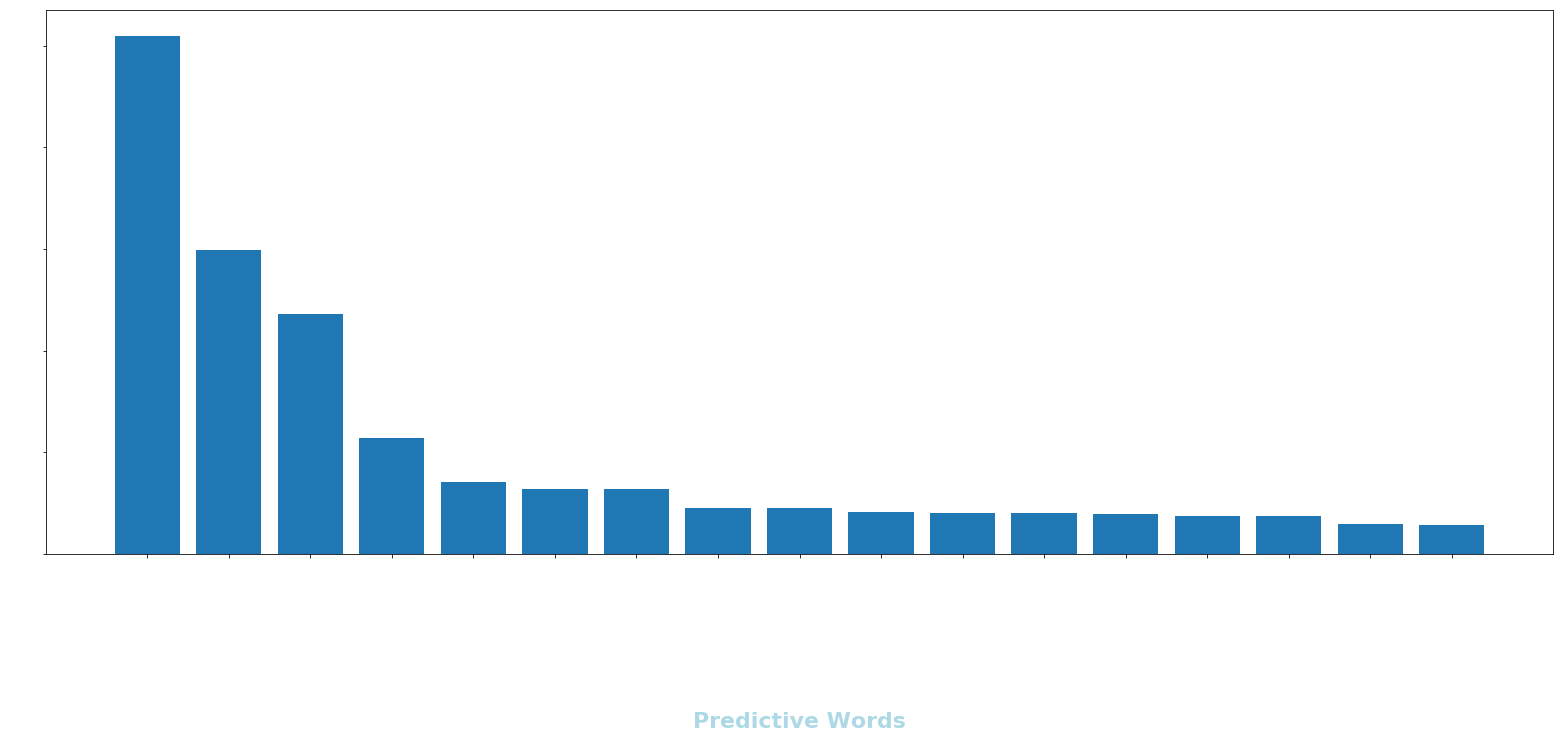

In [83]:
fig, ax = plt.subplots(figsize=(27,10))  # blank plot 

x = np.arange(17) 
important_predictors = [(0.05442929510814468+0.047537983677910685), 0.059829623348979365,
                        0.04714937667855372, 
                       0.02269680908039539, 
                        0.01403672821529004, 
                        0.012774790042760359, 
                       0.0126806472832167, 
                        0.009078597772117464, 0.00898885586359811, 
                       0.008194140970740319, 0.008062566524279332, 
                       0.00800131808028319, 0.0078046349460213936, 0.007376237205935313, 
                       0.0073241024795964536, 0.005809063362360657, 0.005701045736877358]   
plt.bar(x, important_predictors)
plt.yticks( color = 'white', fontweight='bold', fontsize='13' )
plt.xticks(x, ('obama', 'president', 'actonclimate', 'ofa', 'rt whitehouse', 'thank'
              , 'realdonaldtrump', 'read', 'great', 'climate', 'health', 'climate change', 
              'trump', 'getcovered', 'hillary' , 'whitehouse', 'fake'), 
          rotation = 45, color = 'white', fontweight='bold', fontsize='20')   
plt.xlabel('Predictive Words', fontweight='bold', 
           color = 'lightblue', fontsize='22')

plt.show()

In [59]:
list(sorted(zip(best_model.feature_importances_, vect.get_feature_names()), reverse=True))[0:100]

[(0.12199607389304272, 'http'),
 (0.059829623348979365, 'president'),
 (0.05442929510814468, 'president obama'),
 (0.047537983677910685, 'obama'),
 (0.02269680908039539, 'actonclimate'),
 (0.01403672821529004, 'ofa'),
 (0.012774790042760359, 'rt whitehouse'),
 (0.0126806472832167, 'thank'),
 (0.009078597772117464, 'realdonaldtrump'),
 (0.00898885586359811, 'read'),
 (0.008895996151820863, 'great'),
 (0.008647705826921294, 'https'),
 (0.008194140970740319, 'climate'),
 (0.008062566524279332, 'health'),
 (0.00800131808028319, 'climate change'),
 (0.0078046349460213936, 'trump'),
 (0.007376237205935313, 'getcovered'),
 (0.0073241024795964536, 'hillary'),
 (0.005809063362360657, 'whitehouse'),
 (0.005701045736877358, 'fake'),
 (0.00537013343744604, 'add'),
 (0.00528221395367013, 'doyourjob https'),
 (0.00499562608574964, 'progress'),
 (0.004881031272659956, 'gun'),
 (0.004508122952027101, 'doyourjob'),
 (0.004363794094508882, 'enter'),
 (0.004248169598197594, 'sotu'),
 (0.00423282921469869

In [60]:
import matplotlib.pyplot as plt 
import seaborn as sns